In [1]:
# Première application : Make Blobs

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

In [9]:
data=make_blobs(n_samples=200,n_features=2, centers=4, cluster_std=2, random_state=10)
data

(array([[  2.08099699,   6.67249487],
        [  1.21064925,  -7.64120251],
        [ -7.2673524 ,   6.88477779],
        [ -5.58649001,   4.97885278],
        [  5.95743604,  -9.36786396],
        [  1.99810951,  -7.44446274],
        [ -4.80084486,   6.16508285],
        [  1.2588218 ,   6.06940733],
        [ -9.42267856,   6.44351609],
        [ -5.91010391,   4.8778035 ],
        [  2.40450336,  -5.13877233],
        [  5.30258881, -11.09274693],
        [  2.57688205,   4.01450297],
        [  0.16166672,  -4.60602363],
        [ -3.12447054,  -2.81445407],
        [ -6.68514517,   6.53890546],
        [ -8.56192218,   4.77209372],
        [  3.42847087,   8.2048936 ],
        [  0.42675663,   4.19862176],
        [ 10.2158202 ,  -7.75004314],
        [  2.19895633,   5.09064795],
        [  4.74813237,  -8.96062114],
        [ -6.37154409,   5.74975909],
        [ -5.98712752,   9.61254712],
        [ -0.10262483,  -7.1980996 ],
        [  5.32875184,  -8.79827858],
        [  7

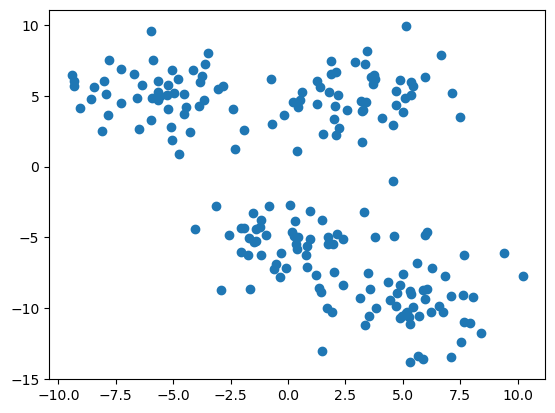

In [10]:
plt.plot(data[0][:,0],data[0][:,1],'o');

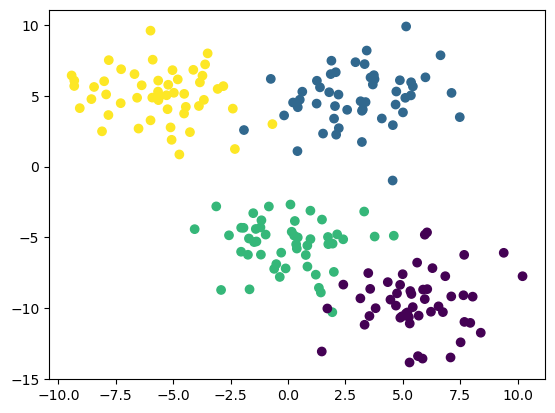

In [12]:
plt.scatter(data[0][:,0],data[0][:,1], c=data[1]);

In [13]:
from sklearn.cluster import KMeans

D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


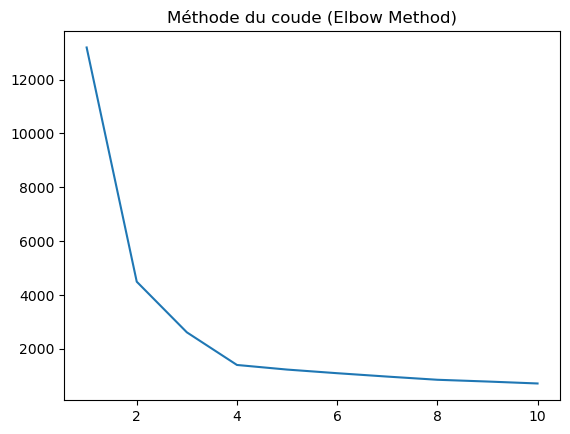

In [14]:
wcss=[]

for i in range(1,11):
    kmean=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmean.fit(data[0])
    wcss.append(kmean.inertia_)

plt.plot(range(1,11), wcss)

plt.title('Méthode du coude (Elbow Method)');

In [15]:
kmean=KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmean.fit(data[0])
y_pred=kmean.predict(data[0])
y_pred

array([2, 1, 0, 0, 3, 1, 0, 2, 0, 0, 1, 3, 2, 1, 1, 0, 0, 2, 2, 3, 2, 3,
       0, 0, 1, 3, 2, 0, 1, 3, 1, 1, 1, 1, 3, 0, 2, 3, 1, 3, 0, 3, 3, 0,
       3, 1, 2, 0, 2, 2, 1, 1, 2, 2, 3, 0, 3, 1, 1, 1, 2, 1, 3, 2, 3, 2,
       3, 2, 0, 2, 1, 0, 2, 2, 2, 2, 2, 0, 3, 0, 1, 0, 1, 0, 0, 2, 2, 3,
       3, 3, 3, 2, 1, 2, 2, 0, 1, 3, 0, 1, 0, 1, 0, 1, 2, 1, 3, 1, 3, 0,
       2, 1, 0, 0, 1, 3, 3, 3, 0, 2, 2, 3, 2, 1, 3, 1, 0, 0, 3, 0, 3, 2,
       3, 1, 2, 1, 3, 0, 1, 2, 2, 1, 0, 0, 3, 0, 3, 1, 2, 3, 0, 0, 3, 3,
       2, 0, 1, 2, 3, 3, 3, 3, 3, 0, 1, 2, 2, 1, 0, 1, 3, 1, 0, 2, 2, 3,
       2, 1, 1, 2, 0, 0, 2, 0, 0, 0, 3, 1, 2, 1, 0, 1, 3, 0, 2, 1, 3, 3,
       2, 3])

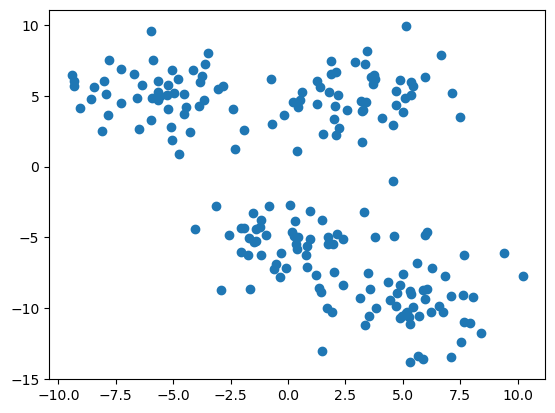

In [16]:
plt.scatter(data[0][:,0],data[0][:,1]);

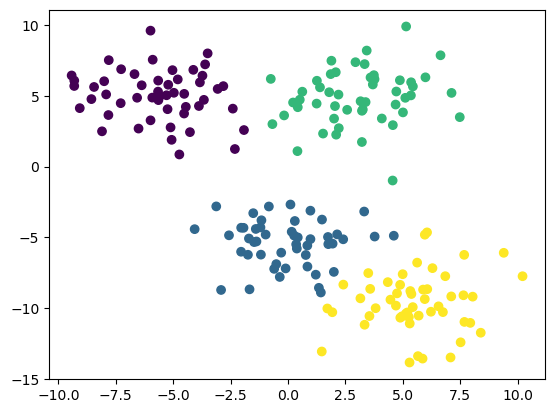

In [17]:
 plt.scatter(data[0][:,0],data[0][:,1], c=y_pred);

In [18]:
# Catégorisation de clientèles d'un centre commercial

In [20]:
import pandas as pd
import numpy as np

In [21]:
dataset=pd.read_csv('D:/DATAS/Mall_Customers.csv')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [23]:
dataset.drop('CustomerID', axis=1, inplace=True)
dataset.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


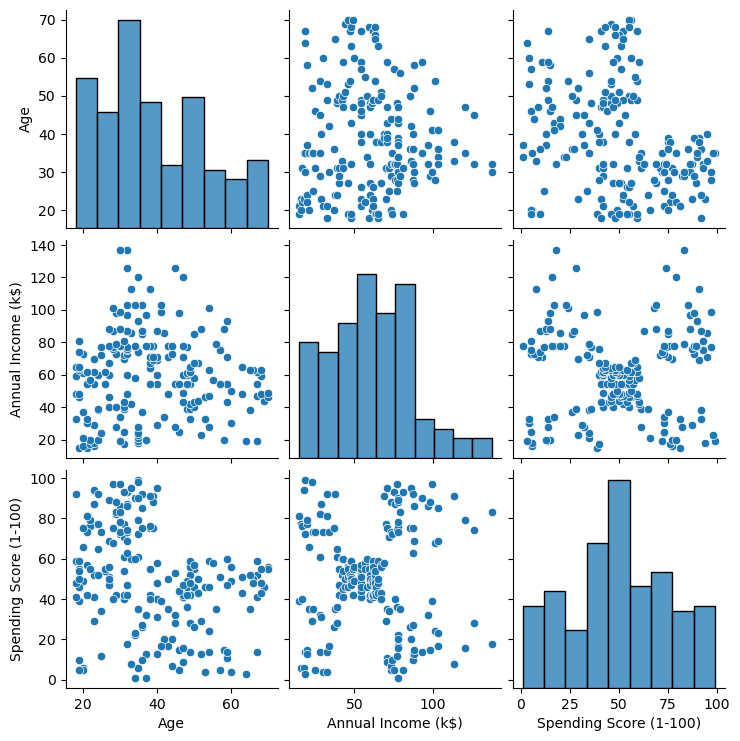

In [24]:
sns.pairplot(dataset);

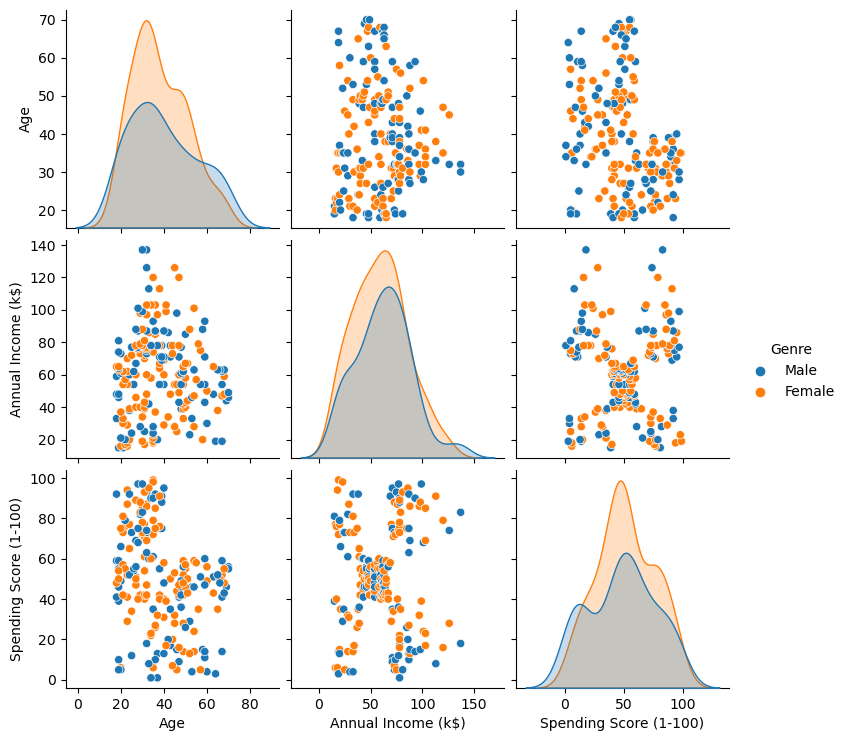

In [25]:
sns.pairplot(dataset, hue='Genre');

In [27]:
X=dataset.iloc[:,[2,3]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

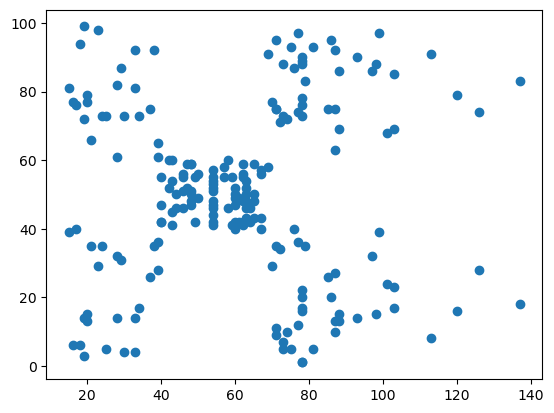

In [29]:
plt.scatter(X[:,0],X[:,1]);

D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


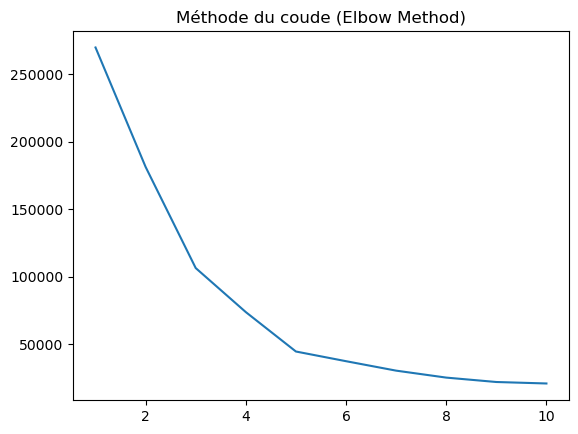

In [30]:
wcss=[]

for i in range(1,11):
    kmean=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmean.fit(X)
    wcss.append(kmean.inertia_)

plt.plot(range(1,11), wcss)

plt.title('Méthode du coude (Elbow Method)');

In [31]:
kmean=KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_predict=kmean.fit_predict(X)
y_predict

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

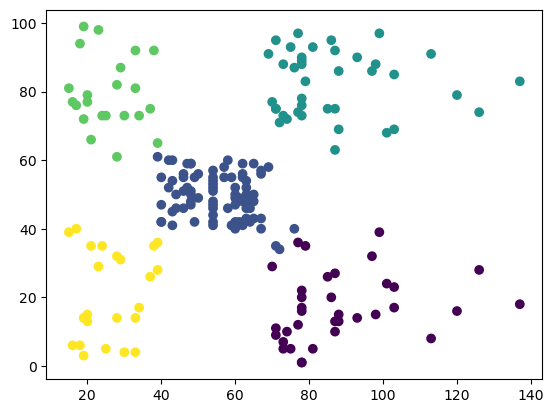

In [33]:
plt.scatter(X[:,0],X[:,1], c=y_predict);

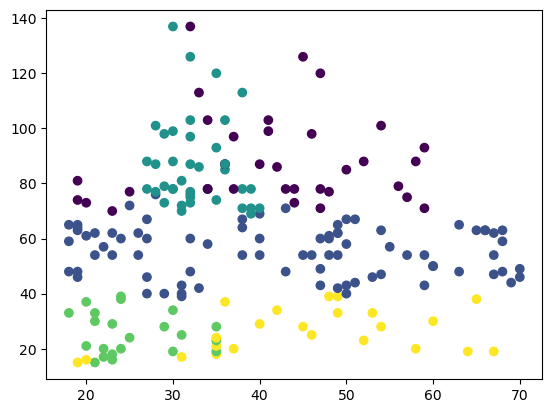

In [38]:
plt.scatter(dataset['Age'],dataset['Annual Income (k$)'], c=y_predict);

In [39]:
X=dataset.iloc[:,[1,2,3]].values
X

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

In [41]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import style

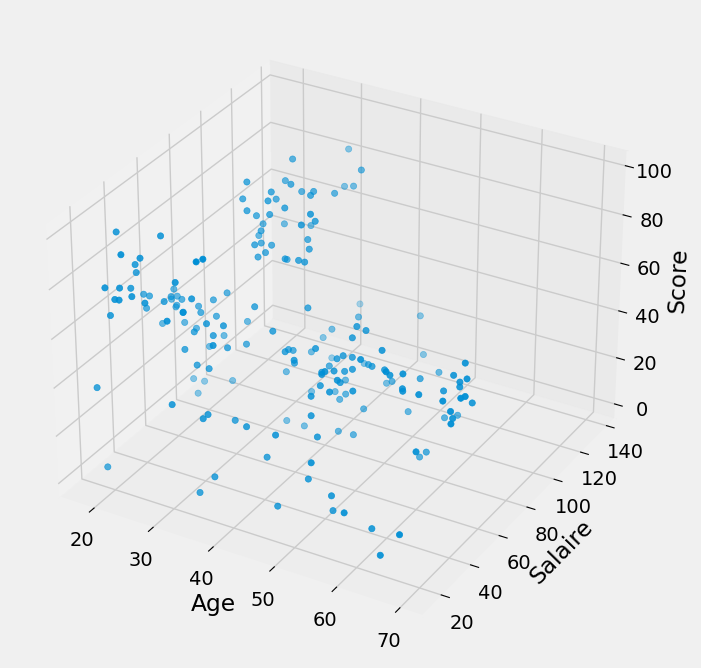

In [42]:
style.use('fivethirtyeight')

fig=plt.figure(figsize=(8,8))
ax1=fig.add_subplot(111, projection='3d')

age=X[:,0]
salaire=X[:,1]
score=X[:,2]

ax1.scatter(age,salaire,score)

ax1.set_xlabel('Age')
ax1.set_ylabel('Salaire')
ax1.set_zlabel('Score');

D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


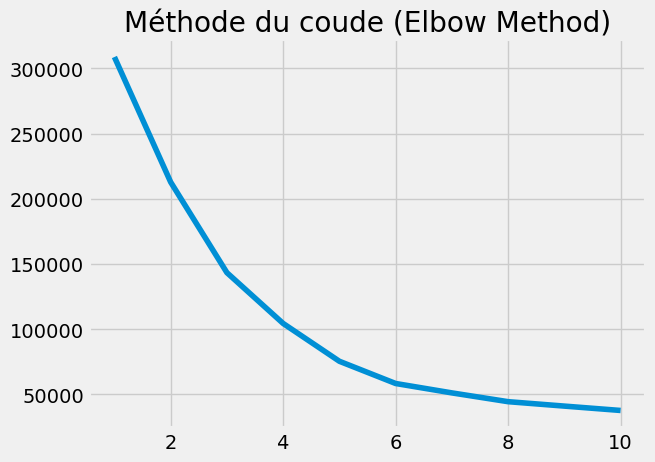

In [43]:
wcss=[]

for i in range(1,11):
    kmean=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmean.fit(X)
    wcss.append(kmean.inertia_)

plt.plot(range(1,11), wcss)

plt.title('Méthode du coude (Elbow Method)');

In [50]:
kmean=KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_predict=kmean.fit_predict(X)
y_predict

array([5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 1, 4, 1, 0,
       5, 4, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

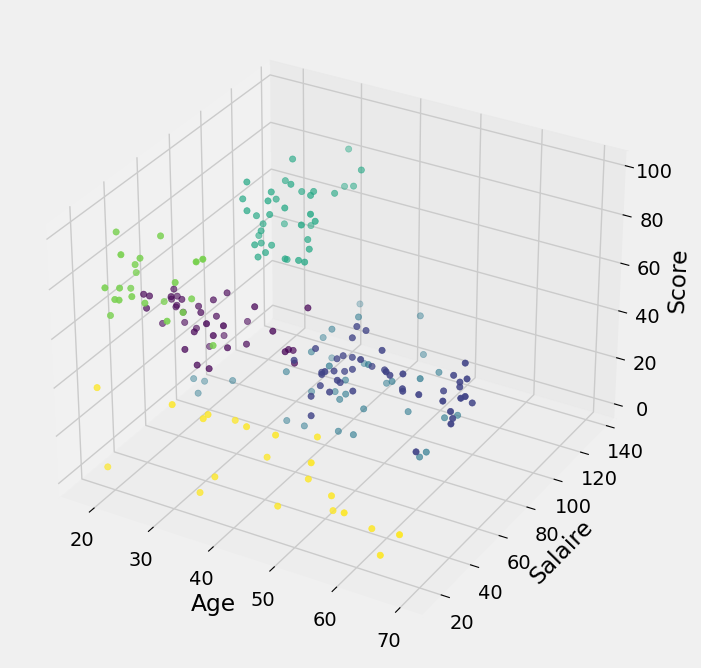

In [51]:
style.use('fivethirtyeight')

fig=plt.figure(figsize=(8,8))
ax1=fig.add_subplot(111, projection='3d')

age=X[:,0]
salaire=X[:,1]
score=X[:,2]

ax1.scatter(age,salaire,score, c=y_predict)

ax1.set_xlabel('Age')
ax1.set_ylabel('Salaire')
ax1.set_zlabel('Score');

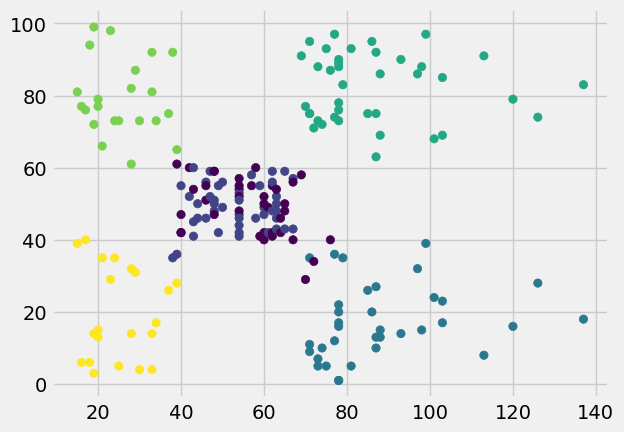

In [52]:
plt.scatter(salaire,score, c=y_predict);

In [53]:
# Intérêt très limité du 6ème groupe ==> 5 groupes

In [56]:
kmean=KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_predict=kmean.fit_predict(X)
y_predict

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

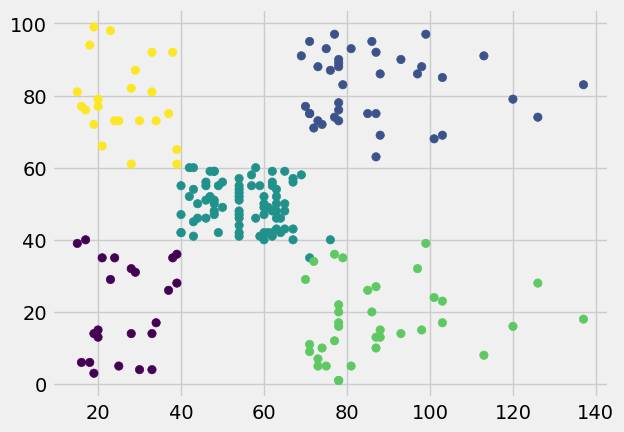

In [57]:
plt.scatter(salaire,score, c=y_predict);

In [59]:
# Reconnaissances de chiffres MNIST

In [61]:
from sklearn.datasets import load_digits

digits=load_digits()

digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [62]:
digits.data.shape

(1797, 64)

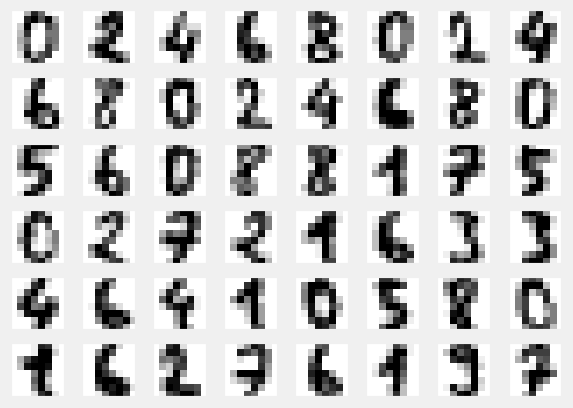

In [64]:
fig,ax=plt.subplots(6,8,subplot_kw=dict(xticks=[],yticks=[]))
for i,ax in enumerate(ax.flat):
    ax.imshow(digits.data[2*i].reshape(8,8), cmap='gray_r')

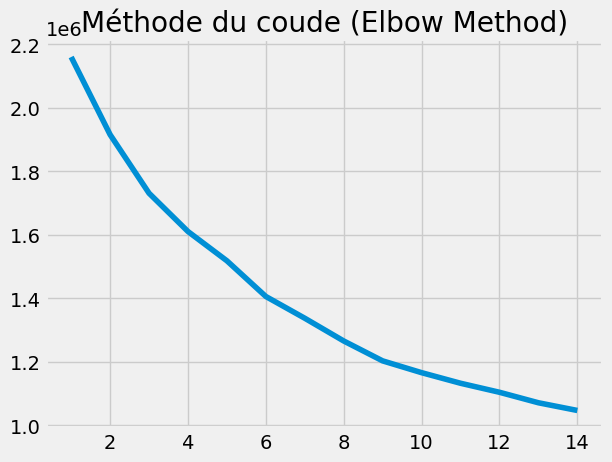

In [66]:
wcss=[]

for i in range(1,15):
    kmean=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmean.fit(digits.data)
    wcss.append(kmean.inertia_)

plt.plot(range(1,15), wcss)

plt.title('Méthode du coude (Elbow Method)');

In [68]:
kmean.labels_

array([3, 7, 7, ..., 7, 1, 1])

In [72]:
clusters=kmean.predict(digits.data)
clusters

array([3, 7, 7, ..., 7, 1, 1])

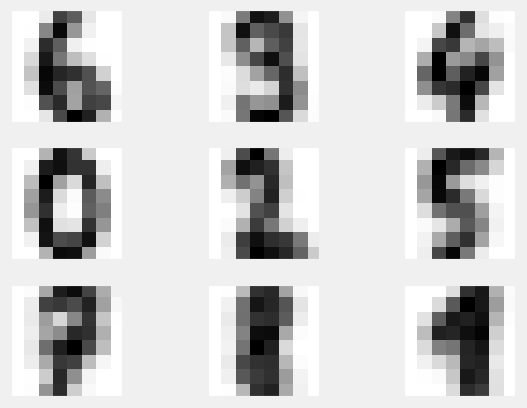

In [70]:
fig,ax=plt.subplots(3,3,subplot_kw=dict(xticks=[],yticks=[]))
centers=kmean.cluster_centers_.reshape(9,8,8)
for ax,center in zip(ax.flat,centers):
    ax.imshow(center, cmap='gray_r')

In [75]:
from scipy.stats import mode
labels=np.zeros_like(clusters)
for i in range(9):
    mask=(clusters==i)
    labels[mask]=mode(digits.target[mask])[0]
labels

C:\Users\bonne\AppData\Local\Temp\ipykernel_4156\2883297700.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask]=mode(digits.target[mask])[0]


array([0, 8, 8, ..., 8, 3, 3])

In [76]:
from sklearn.metrics import accuracy_score

In [77]:
accuracy_score(digits.target,labels)

0.7239844184752365

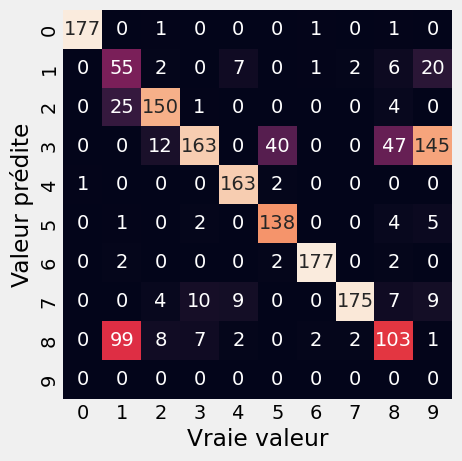

In [80]:
from sklearn.metrics import confusion_matrix
matrice=confusion_matrix(digits.target,labels)
sns.heatmap(matrice.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=digits.target_names,
           yticklabels=digits.target_names)
plt.xlabel('Vraie valeur')
plt.ylabel('Valeur prédite');

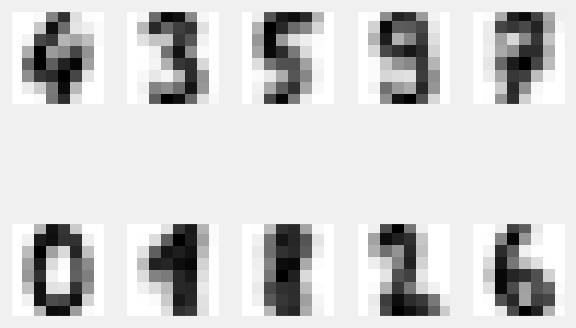

In [81]:
kmean=KMeans(n_clusters=10, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmean.fit(digits.data)
clusters=kmean.predict(digits.data)
fig,ax=plt.subplots(2,5,subplot_kw=dict(xticks=[],yticks=[]))
centers=kmean.cluster_centers_.reshape(10,8,8)
for ax,center in zip(ax.flat,centers):
    ax.imshow(center, cmap='gray_r')

In [82]:
labels=np.zeros_like(clusters)
for i in range(10):
    mask=(clusters==i)
    labels[mask]=mode(digits.target[mask])[0]
accuracy_score(digits.target,labels)

C:\Users\bonne\AppData\Local\Temp\ipykernel_4156\1846736945.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask]=mode(digits.target[mask])[0]


0.7935447968836951

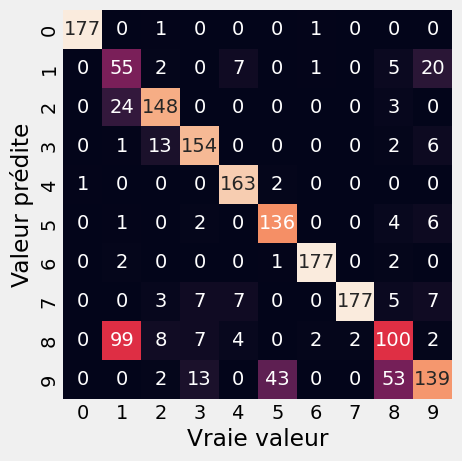

In [83]:
matrice=confusion_matrix(digits.target,labels)
sns.heatmap(matrice.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=digits.target_names,
           yticklabels=digits.target_names)
plt.xlabel('Vraie valeur')
plt.ylabel('Valeur prédite');

In [84]:
# Amélioration avec le Manifold

In [85]:
from sklearn.manifold import TSNE

In [86]:
tsne=TSNE(n_components=2, init='random', random_state=0)
digits_proj=tsne.fit_transform(digits.data)
digits_proj

D:\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[-74.25078   ,   2.4755275 ],
       [ 24.147572  ,  -4.115222  ],
       [  6.5917897 ,  19.70735   ],
       ...,
       [  5.8896456 ,   8.07883   ],
       [-25.126162  ,  -0.3660353 ],
       [ -0.44264698,   9.733199  ]], dtype=float32)

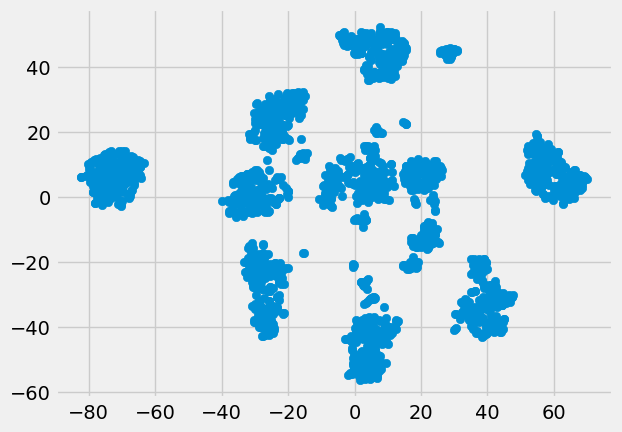

In [87]:
plt.scatter(digits_proj[:,0],digits_proj[:,1]);

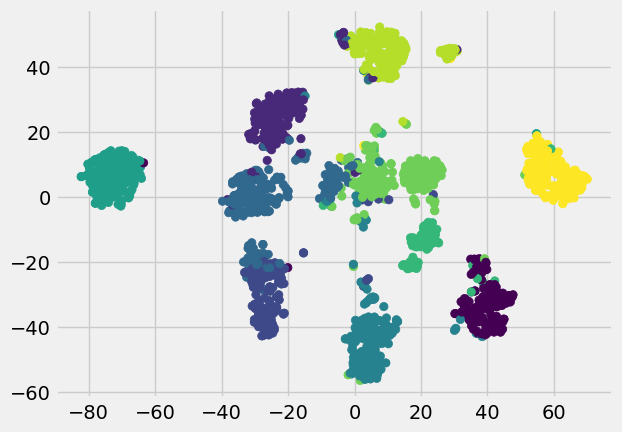

In [89]:
plt.scatter(digits_proj[:,0],digits_proj[:,1], c=kmean.labels_);

In [90]:
kmean=KMeans(n_clusters=10, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmean.fit(digits_proj)
clusters=kmean.predict(digits_proj)
labels=np.zeros_like(clusters)
for i in range(10):
    mask=(clusters==i)
    labels[mask]=mode(digits.target[mask])[0]
accuracy_score(digits.target,labels)

C:\Users\bonne\AppData\Local\Temp\ipykernel_4156\316775673.py:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask]=mode(digits.target[mask])[0]


0.9432387312186978

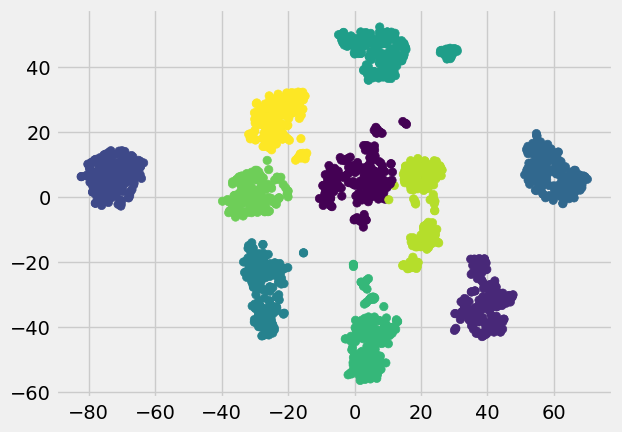

In [91]:
plt.scatter(digits_proj[:,0],digits_proj[:,1], c=kmean.labels_);

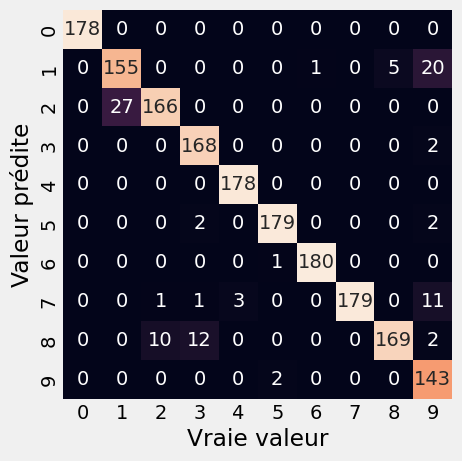

In [92]:
matrice=confusion_matrix(digits.target,labels)
sns.heatmap(matrice.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=digits.target_names,
           yticklabels=digits.target_names)
plt.xlabel('Vraie valeur')
plt.ylabel('Valeur prédite');